## Introduction

The dataset is from AstroDave and Will Cukierski, posted on Kaggle -- 'Digit Recognizer'. The dataset contains the pixel matrix of images of hand writte digits. Our goal is to create models that can accurately classify the hand written digit images. 

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

## Data load / Libraries load

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.decomposition import PCA 
import math
from sklearn.manifold import TSNE

In [3]:
# read data
df_train = pd.read_csv('~/Desktop/train.csv')
df_test = pd.read_csv('~/Desktop/test.csv')

## Data Presentation

In [4]:
df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# descriptive statistics
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
df_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# descriptive statistics
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


## EDA

In [8]:
# check for na values
df_train.isna().sum().sort_values(ascending=False)

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 785, dtype: int64

In [9]:
# check for na values
df_test.isna().sum().sort_values(ascending=False)

pixel0      0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 784, dtype: int64

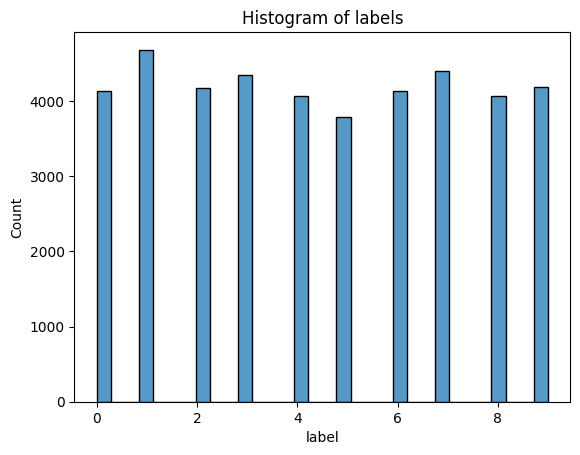

In [10]:
# distribution of target variable
sns.histplot(data=df_train, x='label')
plt.title('Histogram of labels')
plt.show()

In [11]:
# Outliers analysis
def count_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return ((col < lower_bound) | (col > upper_bound)).sum()

outliers = pd.DataFrame(df_train.apply(count_outliers).sort_values(ascending=False), columns= ['outliers'])
outliers.head(10)

,outliers
pixel497,10496
pixel129,10288
pixel357,10207
pixel441,10164
pixel687,10143
pixel623,10137
pixel413,10130
pixel287,10090
pixel204,10040
pixel177,10034


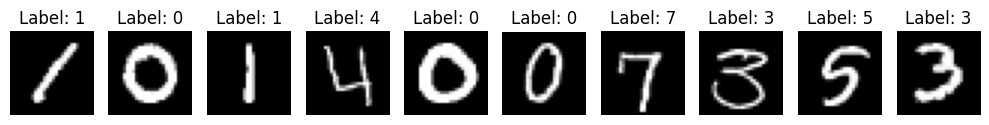

In [12]:
# Sample Visualizations
def plot_sample_images(df, n_samples=5, predicted = False, figsize = (10,3)):
    rows = math.ceil(n_samples/10)
    fig, axes = plt.subplots(rows, n_samples if n_samples <11 else 10, figsize = figsize)
    axes = axes.flatten() 
    if predicted == False:
        for i in range(n_samples):
            img = df.iloc[i, 1:].values.reshape(28, 28)
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f"Label: {df.iloc[i, 0]}")
            axes[i].axis('off')
    else:
        for i in range(n_samples):
            img = df.iloc[i, 2:].values.reshape(28, 28)
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f"Pred: {df.iloc[i, 0]} \n Label: {df.iloc[i, 1]}")
            axes[i].axis('off')


    for j in range(n_samples, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    #plt.subplots_adjust(hspace=0.3, wspace=0.2)
    plt.show()

plot_sample_images(df_train, n_samples = 10, figsize=(10,3))

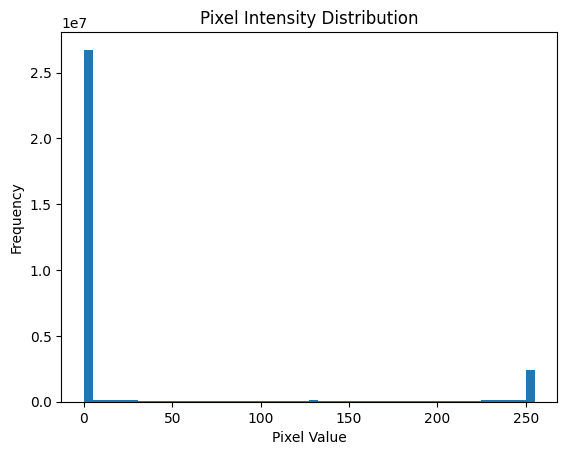

In [13]:
# Check Pixel Intensity Distribution:
plt.hist(df_train.iloc[:, 1:].values.flatten(), bins=50)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## Overview of EDA and next steps 

Since this is a unlabeled dataset and our goal is to create unsupervised learning algorithm, we don't need to care about mullticolinearity or correlations. The good thing is that all labels are approximately uniformly distributed, meaning that the dataset is somewhat balanced and it will help the algorithms to classify outcomes more accurately. 

There is no missing values present in the dataset, therefore we don't need to impute any values. 

Since the value span from 0 to 255, it is crucial to standardize the data before performing dimension reduction

## Cleansing, Preprocessing, and Feature Engineering

In [14]:
# Standardization

sd_scaler = StandardScaler().set_output(transform='pandas')

df_train = sd_scaler.fit_transform(df_train.drop('label', axis=1)).join(df_train[['label']])
df_test = sd_scaler.transform(df_test)

In [15]:
# Confirm that the target label is in numerical
df_train['label'].dtype

dtype('int64')

### Since we are deal wtih image data and our goal is to compare the full size data model vs. PCA data model, we do not have include any specific feature engineering 

## Overview presentation of the cleaned dataset

In [16]:
df_train.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,3


## Model 1: Random Forest Classifier using the full explanatory variables

#### No hyperparameters tuning for the full model for time efficiency

In [17]:
# Split training and testing data
X = df_train.drop('label', axis=1)
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.25)

# Start timer
print("Starting Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(random_state=33)
rf_model = rf_model.fit(X_train, y_train)

end_time = time.time()

y_pred = rf_model.predict(X_test)

print(f'F1 score for Random Forest is {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy score score for Random Forest is {accuracy_score(y_test, y_pred)}')
print(f"Total Time Taken: {(end_time - start_time)/60:.2f} minutes")

Starting Random Forest...
F1 score for Random Forest is 0.9656349246569995
Accuracy score score for Random Forest is 0.9660952380952381
Total Time Taken: 0.20 minutes


## Metric Visualizations of Model 1

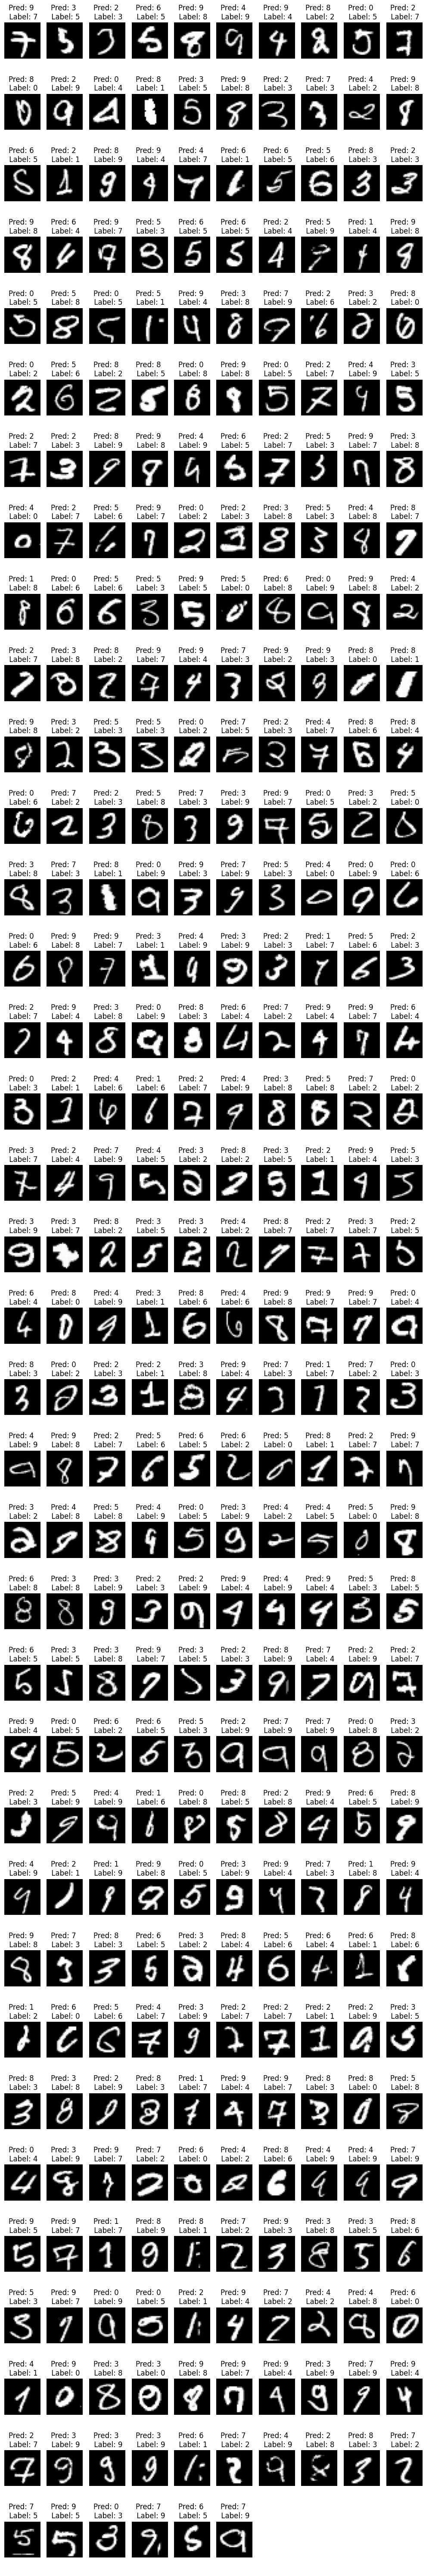

In [18]:
# finding unmatch images
X_test_t = sd_scaler.inverse_transform(X_test)

y_pred_image = pd.DataFrame(y_pred, columns=['predicted']).join(
               pd.DataFrame(y_test.reset_index(drop=True), columns=['label'])).join(
               pd.DataFrame(X_test_t, columns=df_train.drop('label', axis=1).columns))

unmatched_image = y_pred_image[y_pred_image['predicted'] != y_pred_image['label']]

plot_sample_images(unmatched_image, n_samples = unmatched_image.shape[0], predicted=True, figsize = (10,60))

## Data preprocessing specific to model 2

For our second model, we will apply PCA to the dataset for dimensionality reduction

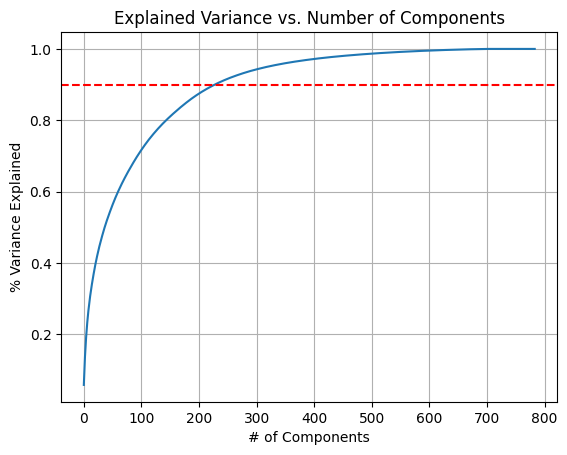

In [19]:
# PCA
pca = PCA().set_output(transform='pandas')
pca.fit(df_train.drop('label', axis=1))

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of Components")
plt.ylabel("% Variance Explained")
plt.title("Explained Variance vs. Number of Components")
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance")
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


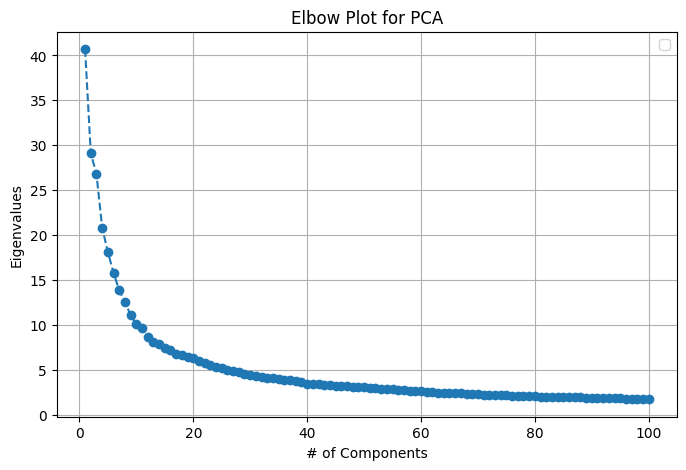

In [20]:
# elbow plot
eigenvalues = pca.explained_variance_[:100]
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel("# of Components")
plt.ylabel("Eigenvalues")
plt.title("Elbow Plot for PCA")
plt.legend()
plt.grid()
plt.show()

#### An elblow plot is a visualization of the eigenvalues of each principal component, where the "elbow" point on the plot indicates the optimal number of components to retain, as it marks the point where the variance explained by each additional component starts to drop significantly, signifying a diminishing return in information captured by further components. 

#### Although the algorithm suggests that we need >210 components to achieve > 90% variance explained, the elblow plot showed a clear significant diminishing return in information captured by further components at component = 12. 

In [21]:
# using 12 components 
pca = PCA(n_components=12).set_output(transform='pandas')

df_train_pca = pca.fit_transform(df_train.drop('label', axis=1)).join(df_train[['label']])
df_test_pca = pca.transform(df_test)

## Model 2: Random Forest on PCA

In [22]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

X = df_train_pca.drop('label', axis=1)
y = df_train_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.25)

# grid_param = {
#     'n_estimators':np.arange(20, 120, 5),
#     'criterion':['gini','entropy','log_loss'],
#     'max_depth':[None] + list(np.arange(20, 200, 5)),
#     'min_samples_split':np.arange(2, 10, 5),
#     'min_samples_leaf':np.arange(1, 10, 4),
#     'max_features':['sqrt','log2', None],
# }
# 
# print("Starting RandomizedSearchCV...")
# start_time = time.time()
# 
# random_search = RandomizedSearchCV(
#     estimator=RandomForestClassifier(random_state=33),
#     param_distributions=grid_param,
#     n_iter=200,  
#     cv=5,  
#     scoring='accuracy',
#     verbose=3, 
#     n_jobs= -1 
# )
# 
# random_search.fit(X_train, y_train)
# 
# end_time = time.time()
# 
# print(f'Best Random Forest parameters: {random_search.best_params_}')
# 
# rf_pca_model = random_search.best_estimator_
# y_pred = rf_pca_model.predict(X_test)

rf_pca_model = RandomForestClassifier(n_estimators = 115, min_samples_split = 2, min_samples_leaf = 1,
                                      max_features = 'sqrt', max_depth = 35, criterion = 'entropy', random_state=33)

rf_pca_model = rf_pca_model.fit(X_train, y_train)
y_pred = rf_pca_model.predict(X_test)

print(f'F1 score for PCA Random Forest is {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy score score for PCA Random Forest is {accuracy_score(y_test, y_pred)}')
print(f"Total Time Taken: {(end_time - start_time)/60:.2f} minutes")

F1 score for PCA Random Forest is 0.9053830728167718
Accuracy score score for PCA Random Forest is 0.9071428571428571
Total Time Taken: 0.20 minutes


#### The list of hyperparameters tunings include:
- n_estimators: 115
- criterion: 2
- max_depth: 1
- min_samples_split: sqrt
- min_samples_leaf: 35
- max_features: entropy

#### We are using RandomSearchCV instead of GridSearchCV for time efficiency. 

## Metric Visualizations of Model 2

In [ ]:
tsne = TSNE(n_components=2, random_state=33, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

tsne_xy = pd.DataFreame(X_tsne, columns = ['x', 'y'])
tsne_xy['label'] = y

centers = tsne_xy.groupby("label")[["x", "y"]].mean().reset_index()



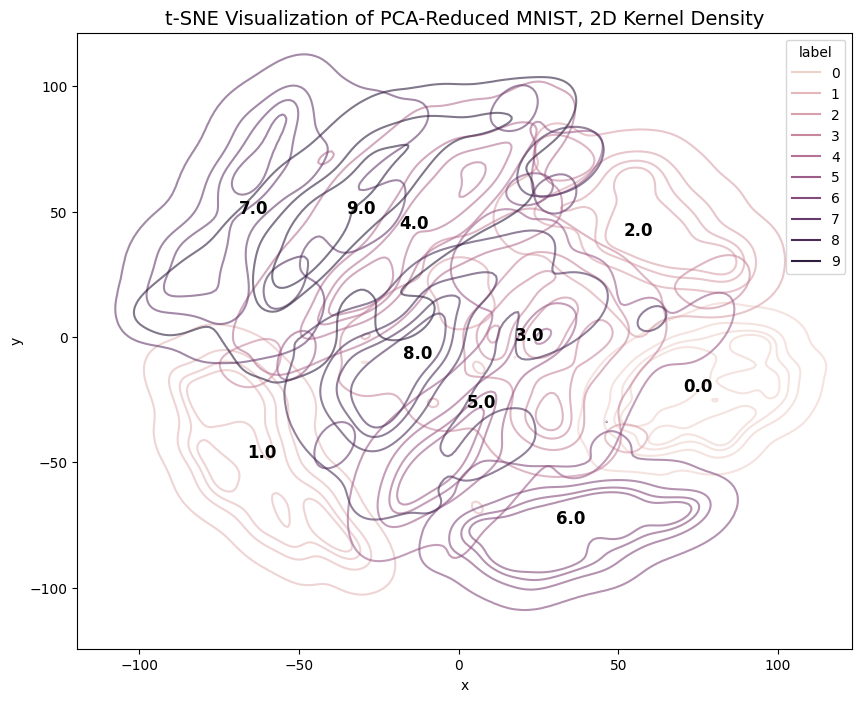

In [33]:
# Step 5: Plot 2D Kernel Density
plt.figure(figsize=(10, 8))
sns.kdeplot(data=tsne_xy, x="x", y="y", hue="label", fill=False, levels=5, alpha=0.6, color = 'tab10')

# Add class labels at computed centers
for _, row in centers.iterrows():
    plt.text(row["x"], row["y"], str(row["label"]),
             fontsize=12, fontweight='bold', ha='center', color="black")

# Formatting
plt.title("t-SNE Visualization of PCA-Reduced MNIST, 2D Kernel Density", fontsize=14)
plt.grid(False)
plt.show()

## Conclusion

## Answers to assignment questions

## References

    AstroDave and Will Cukierski. Digit Recognizer. Kaggle. 2012. 
https://kaggle.com/competitions/digit-recognizer